<a href="https://colab.research.google.com/github/gcbirat12/All_Projects/blob/main/Drowsy_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect the data to Kaggle

In [7]:
!pip install --upgrade kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.8-py3-none-any.whl size=111962 sha256=cf3136dbb8b217a8403c27121f63b5e202469b03eafbf7ee47d3f2c29bacbf8d
  Stored in directory: /root/.cache/pip/wheels/b3/86/2d/2df535a84838c858ca91a03805f9c3131573c8e777fd907689
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"biratgc123","key":"ec72ac6a7eb1ea3bf6b5b29bd2987bb5"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [4]:
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
! kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          18540        370  0.9411765        
jatinthakur706/most-watched-netflix-original-shows-tv-time  Most watched Netflix original shows (TV Time)    2KB  2024-03-27 09:01:21           1593         25  1.0              
mexwell/drug-consumption-classification                     💊 Drug Consumption Classification               56KB  2024-03-28 15:02:22           1356         28  1.0              
samira1992/diabetes-intermediate-dataset                    🩸 Diabetes - Intermediate 🗃️ Dataset         

In [9]:
!kaggle datasets download -d ismailnasri20/driver-drowsiness-dataset-ddd


100% 2.57G/2.58G [00:39<00:00, 109MB/s]
100% 2.58G/2.58G [00:39<00:00, 70.1MB/s]


In [10]:
!unzip driver-drowsiness-dataset-ddd.zip


Streaming output truncated to the last 5000 lines.
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0082.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0083.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0084.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0085.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0086.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0087.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0088.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0089.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0090.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0091.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0092.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0093.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0094.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0095.png

In [11]:
!ls


'Driver Drowsiness Dataset (DDD)'   driver-drowsiness-dataset-ddd.zip   kaggle.json   sample_data


In [12]:
import matplotlib.pyplot as plt
import os
import random


In [13]:
dataset_path = '/content/Driver Drowsiness Dataset (DDD)'  # Adjust this to your dataset's actual path
classes = ['Drowsy', 'Non Drowsy']  # Assuming there are two folders inside 'dataset' directory, one for each class


In [16]:
# Choose a random class
class_choice = random.choice(classes)

# Build the path to the class directory
class_dir_path = os.path.join(dataset_path, class_choice)

# List all files in the chosen directory
images = os.listdir(class_dir_path)

# Choose a random image
image_choice = random.choice(images)

# Build the path to the image file
image_path = os.path.join(class_dir_path, image_choice)


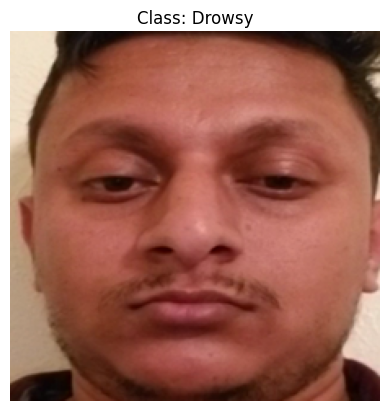

In [17]:
# Load and display the image
img = plt.imread(image_path)
plt.imshow(img)
plt.title(f"Class: {class_choice}")
plt.axis('off')  # Hide the axis
plt.show()


In [18]:
# Initialize a dictionary to hold the count of images in each class
image_counts = {}

# Loop through each class directory and count the files
for class_name in classes:
    class_dir_path = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_dir_path)  # List all files in the directory
    image_counts[class_name] = len(image_files)  # Store the count of images

# Print the counts
for class_name, count in image_counts.items():
    print(f"Number of images in {class_name}: {count}")

Number of images in Drowsy: 22348
Number of images in Non Drowsy: 19445


##Splitting the data

In [24]:
import os
from sklearn.model_selection import train_test_split


# Lists to hold image paths and labels
image_paths = []
labels = []

# Populate the lists
for class_name in classes:
    class_dir_path = os.path.join(dataset_path, class_name)
    current_label = classes.index(class_name)  # 0 for Drowsy, 1 for Non Drowsy
    for image_file in os.listdir(class_dir_path):
        image_paths.append(os.path.join(class_dir_path, image_file))
        labels.append(current_label)  # Append the label corresponding to the class


In [25]:
# Split the dataset into training and a temporary set (for later splitting into validation and test sets)
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    image_paths, labels, test_size=0.3, stratify=labels, random_state=42)

# Split the temporary set into validation and test sets
val_paths, test_paths, val_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)


In [26]:
from collections import Counter

def print_distribution(labels, set_name):
    counter = Counter(labels)
    total = sum(counter.values())
    distribution = {classes[k]: (v / total) * 100 for k, v in counter.items()}
    print(f"Distribution in {set_name}: {distribution}")

print_distribution(train_labels, "Training Set")
print_distribution(val_labels, "Validation Set")
print_distribution(test_labels, "Test Set")


Distribution in Training Set: {'Non Drowsy': 46.52538027687575, 'Drowsy': 53.47461972312425}
Distribution in Validation Set: {'Non Drowsy': 46.53054713670442, 'Drowsy': 53.46945286329559}
Distribution in Test Set: {'Drowsy': 53.46945286329559, 'Non Drowsy': 46.53054713670442}


In [28]:

# Base directory where the split directories will be created
base_dir = dataset_path  # Replace this with the path where you want the split directories

# Names of the splits
splits = ['train', 'validation', 'test']
classes = ['Drowsy', 'Non Drowsy']

# Create directories
for split in splits:
    for cls in classes:
        directory_path = os.path.join(base_dir, split, cls)
        os.makedirs(directory_path, exist_ok=True)


In [29]:
import shutil

# Function to move files
def move_files(file_paths, labels, split):
    for file_path, label in zip(file_paths, labels):
        # Determine the class based on the label
        class_name = classes[label]
        # Destination directory
        dest_dir = os.path.join(base_dir, split, class_name)
        # Move the file
        shutil.move(file_path, dest_dir)

# Move the files for each split
move_files(train_paths, train_labels, 'train')
move_files(val_paths, val_labels, 'validation')
move_files(test_paths, test_labels, 'test')


In [30]:
def count_images(base_dir, splits, classes):
    for split in splits:
        print(f"Count in {split}:")
        total_count = 0
        for cls in classes:
            path = os.path.join(base_dir, split, cls)
            count = len(os.listdir(path))
            total_count += count
            print(f"  {cls}: {count} images")
        print(f"Total in {split}: {total_count} images\n")

base_dir = '/content/Driver Drowsiness Dataset (DDD)'  # Adjust this to your base directory
splits = ['train', 'validation', 'test']
classes = ['Drowsy', 'Non Drowsy']

count_images(base_dir, splits, classes)


Count in train:
  Drowsy: 15644 images
  Non Drowsy: 13611 images
Total in train: 29255 images

Count in validation:
  Drowsy: 3352 images
  Non Drowsy: 2917 images
Total in validation: 6269 images

Count in test:
  Drowsy: 3352 images
  Non Drowsy: 2917 images
Total in test: 6269 images



## CNN Architecture

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [32]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Driver Drowsiness Dataset (DDD)/train',
        target_size=(227, 227),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/content/Driver Drowsiness Dataset (DDD)/validation',
        target_size=(227, 227),
        batch_size=20,
        class_mode='binary')

Found 29255 images belonging to 2 classes.
Found 6269 images belonging to 2 classes.


In [ ]:
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=75,  # Adjust based on your dataset size
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # Adjust based on your dataset size
      verbose=2)

Epoch 1/10
75/75 - 204s - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0143 - val_accuracy: 0.9950 - 204s/epoch - 3s/step
Epoch 2/10
75/75 - 192s - loss: 0.0320 - accuracy: 0.9913 - val_loss: 0.0106 - val_accuracy: 0.9930 - 192s/epoch - 3s/step
Epoch 3/10


In [36]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/Driver Drowsiness Dataset (DDD)/test',  # Specify the path to your test data
    target_size=(227, 227),
    batch_size=20,  # Adjust based on your preference
    class_mode='binary',  # Use 'categorical' for multi-class classification
    shuffle=False)  # Important: keep data in same order as labels


Found 6269 images belonging to 2 classes.


In [37]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // test_generator.batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 [==============================] - 175s 558ms/step - loss: 0.0305 - accuracy: 0.9915
Test Loss: 0.030462848022580147
Test Accuracy: 0.9915335178375244


In [38]:
predictions = model.predict(test_generator, steps=test_generator.n // test_generator.batch_size)
# The output `predictions` will be in the form of probabilities. You may convert these to binary predictions as follows:
binary_predictions = [1 if x > 0.5 else 0 for x in predictions]


313/313 [==============================] - 177s 562ms/step


In [39]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

uploaded = files.upload()

# Assuming you upload one image file, get the image's name
image_name = next(iter(uploaded))


Saving Test.jpeg to Test.jpeg


In [40]:
# Load the image with the correct target size for your model
image = load_img(image_name, target_size=(227, 227))

# Convert the image to an array and normalize if necessary
image_array = img_to_array(image) / 255.0  # Rescale the image (if your model expects values between 0 and 1)

# Add a batch dimension
image_array = np.expand_dims(image_array, axis=0)


In [41]:
prediction = model.predict(image_array)


1/1 [==============================] - 0s 110ms/step


In [42]:
if prediction[0][0] > 0.5:
    print(f"The image is likely 'Non Drowsy' with a probability of {prediction[0][0]}")
else:
    print(f"The image is likely 'Drowsy' with a probability of {1 - prediction[0][0]}")


The image is likely 'Drowsy' with a probability of 0.9459670037031174


In [44]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [45]:
model_save_path = '/content/drive/My Drive/Colab Models/drowsy_prediction_model.h5'
model.save(model_save_path)
